# import libraries
# read the data

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('../input/spam-emails/emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Shape of train and test

In [2]:
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))

There are 5172 rows and 3002 columns in train


# The column labels of the DataFrame.

In [3]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

# Return the dtypes in the DataFrame.

In [4]:
data.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

# Compute pairwise correlation of columns, excluding NA/null values.


In [5]:
data.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


# Drop specified labels(Email No.) from rows or columns.

In [6]:
data.drop('Email No.', axis=1, inplace=True)

# data splitting

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# returns a Series containing the counts of unique values.

In [8]:
data['Prediction'].value_counts()


0    3672
1    1500
Name: Prediction, dtype: int64

# Generate descriptive statistics from data
# ‘all’ : All columns of the input will be included in the output.

In [9]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [10]:
data.info

<bound method DataFrame.info of       the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
0       0   0    1    0    0   0    2    0    0   0  ...         0    0   
1       8  13   24    6    6   2  102    1   27  18  ...         0    0   
2       0   0    1    0    0   0    8    0    0   4  ...         0    0   
3       0   5   22    0    5   1   51    2   10   1  ...         0    0   
4       7   6   17    1    5   2   57    0    9   3  ...         0    0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
5167    2   2    2    3    0   0   32    0    0   5  ...         0    0   
5168   35  27   11    2    6   5  151    4    3  23  ...         0    0   
5169    0   0    1    1    0   0   11    0    0   1  ...         0    0   
5170    2   7    1    0    2   1   28    2    0   8  ...         0    0   
5171   22  24    5    1    6   5  148    8    2  23  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Pre

# Count number of distinct elements in specified axis.

In [11]:
data.nunique()

the           90
to            72
ect           90
and           53
for           42
              ..
military       4
allowing       3
ff            23
dry            4
Prediction     2
Length: 3001, dtype: int64

# I get a list of the null count for each column

In [12]:
data.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

# Step 1 : EDA (Exploratory Data Analysis)

<AxesSubplot:>

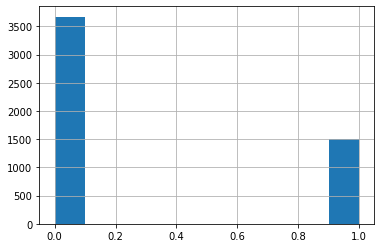

In [13]:
data.Prediction.hist()

# Variance selector caveats

<AxesSubplot:>

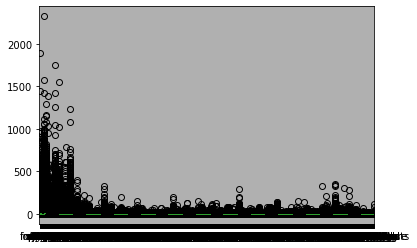

In [14]:
data.boxplot()

# visualization for y


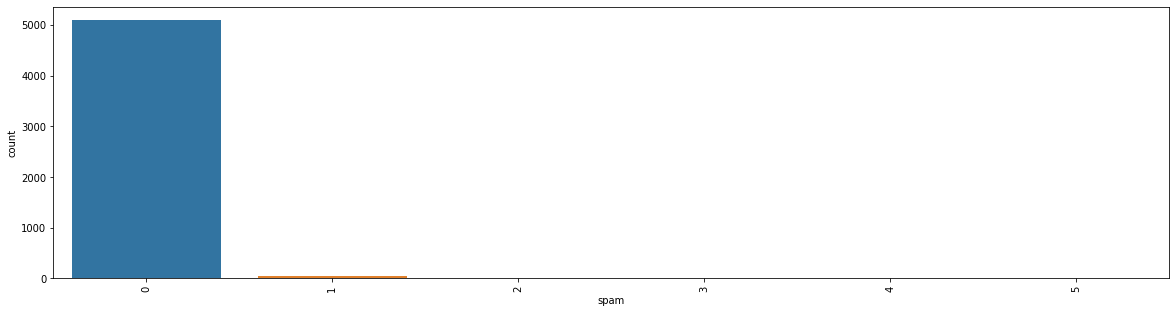

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="spam", data=data)
plt.show()


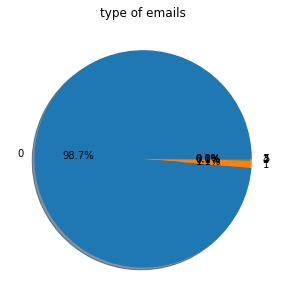

In [16]:
targetCounts = data['spam'].value_counts()
targetLabels = data['spam'].unique()
plt.figure(figsize=(20,5))
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.title("type of emails")
plt.show()

<AxesSubplot:>

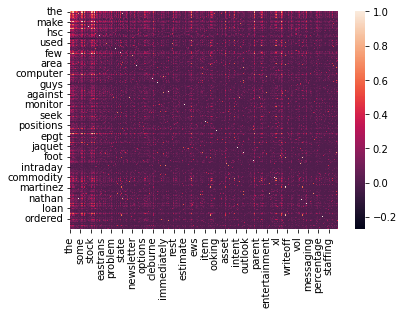

In [17]:
sns.heatmap(data.corr())

## Model building starts

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

### Applying LogisticRegression Model 

the score is 0.9992748368382887
the score is 0.9671497584541063
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [754]
Confusion Matrix is : 
 [[722  19]
 [ 15 279]]


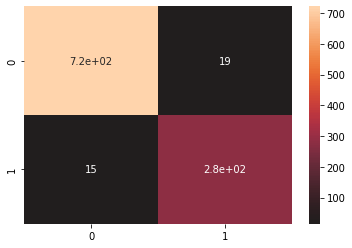

In [19]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_model=LogisticRegression(tol = 0.1,C = 0.6 ,max_iter= 1500 ,random_state=40)
LogisticRegression_model.fit(X_train,y_train)
#Calculating Prediction
y_pred_rfr = LogisticRegression_model.predict(X_test)
#Calculating Score for train and test
print('the score is {}'.format(LogisticRegression_model.score(X_train, y_train)))
#Calculating Score for train and test
print('the score is {}'.format(LogisticRegression_model.score(X_test, y_test)))
print('LogisticRegressionModel Classes are : ' , LogisticRegression_model.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegression_model.n_iter_)
#Calculating Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_rfr)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True)
plt.show()


# Calculating classification_report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfr))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       741
           1       0.94      0.95      0.94       294

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035

